# Pre-requisite Loading

In [ ]:
from keras.models import Model, load_model
from sklearn.model_selection import train_test_split
from sklearn.metrics import precision_score, recall_score, f1_score, accuracy_score
from os import listdir, chdir, getcwd
from PIL import Image
import numpy as np
from random import randint

In [ ]:
from keras.layers import Dense
from keras.layers import Flatten
from keras.losses import SparseCategoricalCrossentropy
from keras.metrics import SparseCategoricalAccuracy
from keras.optimizers import RMSprop
from keras.optimizers import Adam

In [ ]:
from keras.utils import array_to_img

In [ ]:
try:
  chdir('./drive/MyDrive/Minor Project')
except:
  print('Failed to change dir to project root, curr dir is:', getcwd())

In [ ]:
try:
  images = np.load('images.npy')
  labels = np.load('labels.npy')
except:
  print('Failed to load data')

In [ ]:
label_dict = dict()


for i in range(np.unique(labels).shape[0]):
    label_dict[np.unique(labels)[i]] = i

rev_label_dict = { v:k for k,v in label_dict.items()}

for i in range(labels.shape[0]):
    labels[i] = label_dict.get(labels[i])
labels = labels.astype(np.uint8)

X_train, X_test, y_train, y_test = train_test_split(images, labels, test_size = 0.5, random_state = 0)

# VGGNet

Training time: 1 hr 40 mins

In [ ]:
VGGmodel = load_model('VGGmodel')

# summarize
VGGmodel.summary()

Model: "functional_5"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_3 (InputLayer)        [(None, 224, 224, 3)]     0         
                                                                 
 block1_conv1 (Conv2D)       (None, 224, 224, 64)      1792      
                                                                 
 block1_conv2 (Conv2D)       (None, 224, 224, 64)      36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, 112, 112, 64)      0         
                                                                 
 block2_conv1 (Conv2D)       (None, 112, 112, 128)     73856     
                                                                 
 block2_conv2 (Conv2D)       (None, 112, 112, 128)     147584    
                                                                 
 block2_pool (MaxPooling2D)  (None, 56, 56, 128)      

In [ ]:
y_pred = VGGmodel.predict(X_test)
y_pred.shape
y_predict = np.empty((1471,1), dtype = np.uint8)

for i in range(y_pred.shape[0]):
    y_predict[i] = np.array([0,1,2])[y_pred[i,:] == max(y_pred[i,:])]


y_predict = y_predict.reshape(-1,)

y_predict = y_predict.ravel()

46/46 [==============================] - 824s 18s/step


In [ ]:
#from sklearn.metrics import precision_score, recall_score, f1_score, accuracy_score

vgg_metrics = [accuracy_score(y_test, y_predict)*100,\
               precision_score(y_test, y_predict, average='weighted')*100,\
               recall_score(y_test, y_predict, average='weighted')*100,\
               f1_score(y_test, y_predict, average='weighted')*100]

print('Accuracy, Precision, Recall, F1:', tuple(vgg_metrics))

Accuracy, Precision, Recall, F1: (93.8137321549966, 94.1819288417366, 93.8137321549966, 93.72490203672277)


In [ ]:
test_images = [randint(0, X_test.shape[0]) for _ in range(9)]
print(test_images)

[818, 488, 286, 57, 586, 368, 606, 518, 190]


1/1 [==============================] - 1s 613ms/step


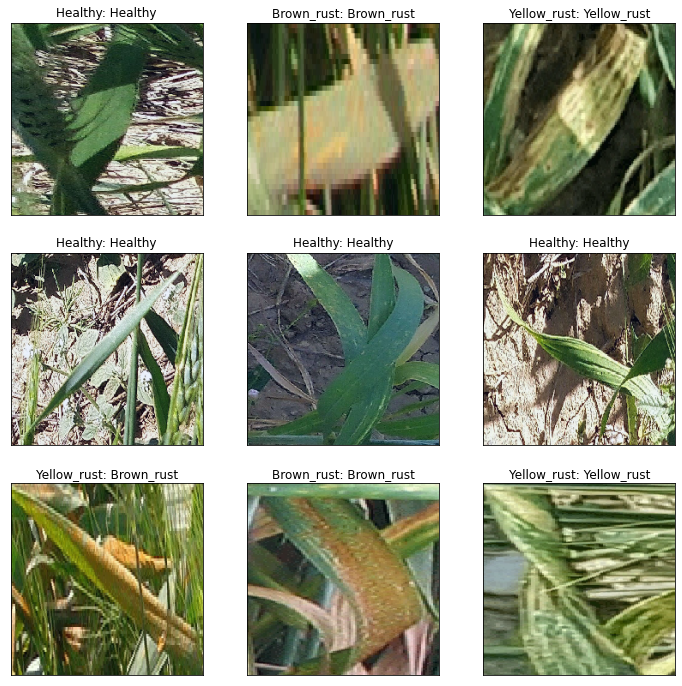

In [ ]:
from cv2 import (cvtColor, COLOR_BGR2RGB)

cv_images = np.empty(shape = (9,224,224,3), dtype = np.uint8)
for img in range(9):
  cv_images[img] = cvtColor(np.array(array_to_img(X_test[test_images[img]])), COLOR_BGR2RGB)
cv_images.shape

from matplotlib.pyplot import (subplots, imshow, figure, xticks, yticks, title)
from math import floor
#fig, axes = subplots(3,3)
#imshow(cv_images[0], ax = axes[0,0])
f1 = figure(figsize=(12,12))

for i in range(cv_images.shape[0]):
  f1.add_subplot(3,3,i+1)
  #ax_ind = axes[i%3, floor(i/3)]
  pred = VGGmodel.predict(np.array([X_test[test_images[i]],]))
  pred = rev_label_dict.get(np.array([0,1,2])[pred[0,:] == max(pred[0,:])][0])
  pred = pred + ': ' + rev_label_dict.get(y_test[test_images[i]])
  imshow(cv_images[i])
  xticks([])
  yticks([])
  title(pred)
#imshow(cv_images[0])

# MobileNet

Training time: 30 mins

In [ ]:
Mobilemodel = load_model('Mobilemodel')
Mobilemodel.summary()

Model: "functional_7"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_4 (InputLayer)        [(None, 224, 224, 3)]     0         
                                                                 
 conv1_pad (ZeroPadding2D)   (None, 225, 225, 3)       0         
                                                                 
 conv1 (Conv2D)              (None, 112, 112, 32)      864       
                                                                 
 conv1_bn (BatchNormalizatio  (None, 112, 112, 32)     128       
 n)                                                              
                                                                 
 conv1_relu (ReLU)           (None, 112, 112, 32)      0         
                                                                 
 conv_dw_1 (DepthwiseConv2D)  (None, 112, 112, 32)     288       
                                                      

In [ ]:
y_pred = Mobilemodel.predict(X_test)
y_pred.shape
y_predict = np.empty((1471,1), dtype = np.uint8)

np.array([0,1,2])[y_pred[0,:] == max(y_pred[0,:])]

for i in range(y_pred.shape[0]):
    y_predict[i] = np.array([0,1,2])[y_pred[i,:] == max(y_pred[i,:])]


y_predict = y_predict.reshape(-1,)

y_predict = y_predict.ravel()

46/46 [==============================] - 72s 2s/step


In [ ]:
#from sklearn.metrics import precision_score, recall_score, f1_score, accuracy_score

mobile_metrics = [accuracy_score(y_test, y_predict)*100,\
               precision_score(y_test, y_predict, average='weighted')*100,\
               recall_score(y_test, y_predict, average='weighted')*100,\
               f1_score(y_test, y_predict, average='weighted')*100]

print('Accuracy, Precision, Recall, F1:', tuple(mobile_metrics))

Accuracy, Precision, Recall, F1: (98.77634262406526, 98.78345121398223, 98.77634262406526, 98.77414036391767)


In [ ]:
test_images = [randint(0, X_test.shape[0]) for _ in range(9)]
print(test_images)

[431, 829, 955, 952, 736, 210, 1279, 1219, 408]


1/1 [==============================] - 0s 75ms/step


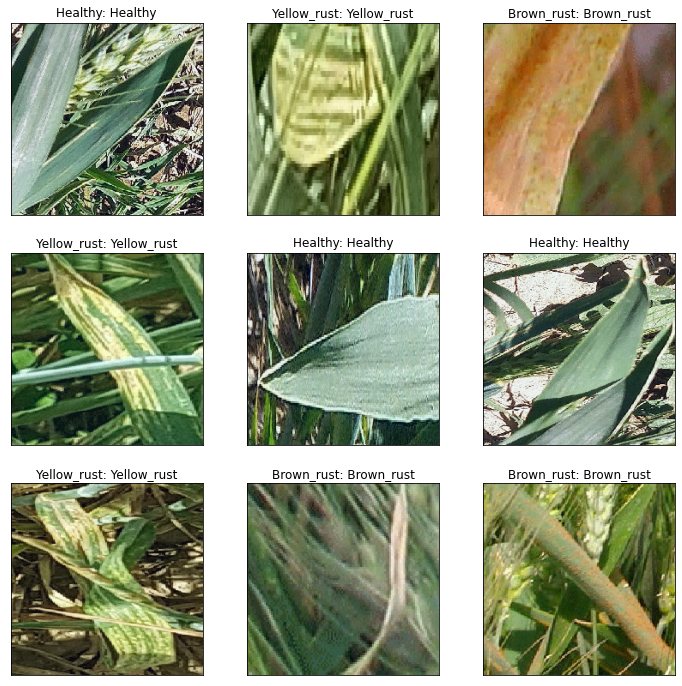

In [ ]:
from cv2 import (cvtColor, COLOR_BGR2RGB)

cv_images = np.empty(shape = (9,224,224,3), dtype = np.uint8)
for img in range(9):
  cv_images[img] = cvtColor(np.array(array_to_img(X_test[test_images[img]])), COLOR_BGR2RGB)
cv_images.shape

from matplotlib.pyplot import (subplots, imshow, figure, xticks, yticks, title)
from math import floor
#fig, axes = subplots(3,3)
#imshow(cv_images[0], ax = axes[0,0])
f1 = figure(figsize=(12,12))

for i in range(cv_images.shape[0]):
  f1.add_subplot(3,3,i+1)
  #ax_ind = axes[i%3, floor(i/3)]
  pred = Mobilemodel.predict(np.array([X_test[test_images[i]],]))
  pred = rev_label_dict.get(np.array([0,1,2])[pred[0,:] == max(pred[0,:])][0])
  pred = pred + ': ' + rev_label_dict.get(y_test[test_images[i]])
  imshow(cv_images[i])
  xticks([])
  yticks([])
  title(pred)
#imshow(cv_images[0])

# ResNet50

Training time: 1 hour

In [ ]:
from keras.applications.resnet import ResNet50
from keras.applications.resnet import preprocess_input

In [ ]:
try:
    images = np.load('imagesRESNET.npy')
except:
    print("error loading dataset")

In [ ]:
Resmodel = load_model('ResNetmodel')

# summarize
Resmodel.summary()

Model: "functional_1"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_1 (InputLayer)           [(None, 224, 224, 3  0           []                               
                                )]                                                                
                                                                                                  
 conv1_pad (ZeroPadding2D)      (None, 230, 230, 3)  0           ['input_1[0][0]']                
                                                                                                  
 conv1_conv (Conv2D)            (None, 112, 112, 64  9472        ['conv1_pad[0][0]']              
                                )                                                                 
                                                                                       

In [ ]:
y_pred = Resmodel.predict(X_test)
y_pred.shape
y_predict = np.empty((1471,1), dtype = np.uint8)

np.array([0,1,2])[y_pred[0,:] == max(y_pred[0,:])]

for i in range(y_pred.shape[0]):
    y_predict[i] = np.array([0,1,2])[y_pred[i,:] == max(y_pred[i,:])]


y_predict = y_predict.reshape(-1,)

y_predict = y_predict.ravel()

46/46 [==============================] - 301s 7s/step


In [ ]:
from sklearn.metrics import precision_score, recall_score, f1_score, accuracy_score

res_metrics = [accuracy_score(y_test, y_predict)*100,\
               precision_score(y_test, y_predict, average='weighted')*100,\
               recall_score(y_test, y_predict, average='weighted')*100,\
               f1_score(y_test, y_predict, average='weighted')*100]

print('Accuracy, Precision, Recall, F1:', tuple(res_metrics))

Accuracy, Precision, Recall, F1: (37.72943575798776, 20.90439679341005, 37.72943575798776, 21.12506443099125)


/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [ ]:
test_images = [randint(0, X_test.shape[0]) for _ in range(9)]
print(test_images)

[82, 977, 743, 659, 1009, 894, 184, 168, 331]


1/1 [==============================] - 0s 499ms/step


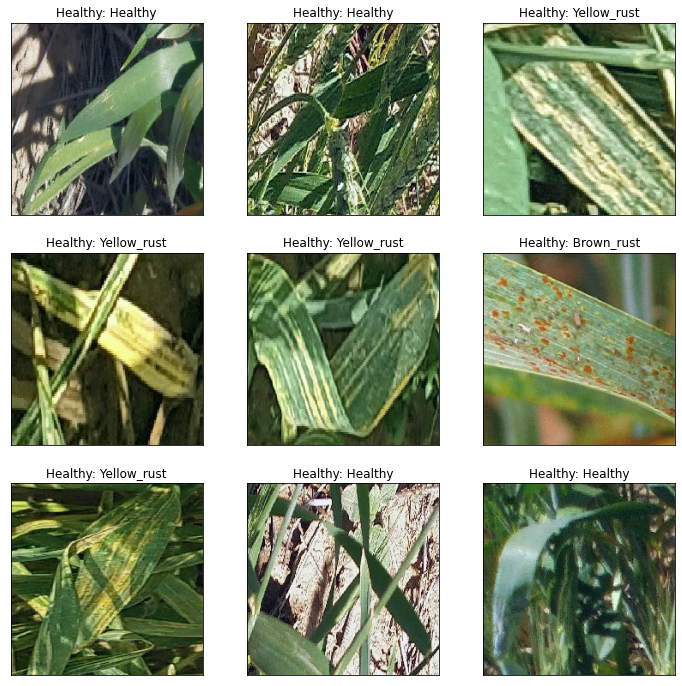

In [ ]:
from cv2 import (cvtColor, COLOR_BGR2RGB)

cv_images = np.empty(shape = (9,224,224,3), dtype = np.uint8)
for img in range(9):
  cv_images[img] = cvtColor(np.array(array_to_img(X_test[test_images[img]])), COLOR_BGR2RGB)
cv_images.shape

from matplotlib.pyplot import (subplots, imshow, figure, xticks, yticks, title)
from math import floor
#fig, axes = subplots(3,3)
#imshow(cv_images[0], ax = axes[0,0])
f1 = figure(figsize=(12,12))

for i in range(cv_images.shape[0]):
  f1.add_subplot(3,3,i+1)
  #ax_ind = axes[i%3, floor(i/3)]
  pred = Resmodel.predict(np.array([X_test[test_images[i]],]))
  pred = rev_label_dict.get(np.array([0,1,2])[pred[0,:] == max(pred[0,:])][0])
  pred = pred + ': ' + rev_label_dict.get(y_test[test_images[i]])
  imshow(cv_images[i])
  xticks([])
  yticks([])
  title(pred)
#imshow(cv_images[0])